## Generate masks with different background

In [41]:
import random
from pathlib import Path
import torch
from torch.nn import Module,Linear
from torch.nn.utils import spectral_norm
from torch.nn.functional import interpolate, relu,tanh
import torch.nn.functional as F
from torch.nn import UpsamplingNearest2d,Conv2d
from torch.nn.utils import spectral_norm
from torch.distributions import Normal
import torch
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import utils
import glob
from torchvision.io import read_image
import os
from torchvision.models import vgg16
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im

In [5]:
## I think there is supposed to be a different training data folder but I cant find where to download it
DATA_DIR = r"C:\Users\20191679\Documents\Master\CS_image_analysis\TrainingData"


In [6]:
from torch.utils.data import DataLoader

IMAGE_SIZE = [64, 64]  # images are made smaller to save training time
BATCH_SIZE = 32
NO_VALIDATION_PATIENTS=5

In [8]:
patients = [
    path
    for path in glob.glob(DATA_DIR+r"\p*[0-9]")
]

partition = {
    "train": patients[:-NO_VALIDATION_PATIENTS],
    "validation": patients[-NO_VALIDATION_PATIENTS:],
}

In [9]:
dataset = utils.ProstateMRDataset(partition["train"], IMAGE_SIZE)

In [10]:
dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    pin_memory=True,
)

In [40]:
img,seg=next(iter(dataloader))
print(seg.size())

torch.Size([32, 1, 64, 64])


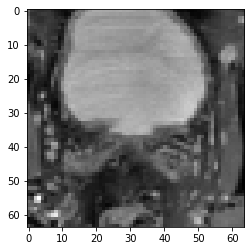

In [30]:
plt.imshow(img[3,0,:,:], cmap='gray')

In [37]:
seg2=np.arange(131072)
seg2=np.reshape(seg2,(32,1,64,64))
for pt in range(32):
    for i in range(64):
        for j in range(64):
            if seg[pt,0,i,j] == 0:
                seg2[pt,0,i,j] = img[pt,0,i,j]
                
            else:
                seg2[pt,0,i,j] = 1

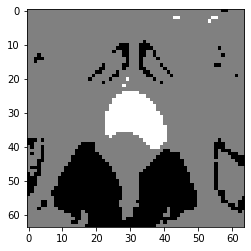

In [64]:
plt.imshow(seg2[9,0,:,:], cmap='gray')

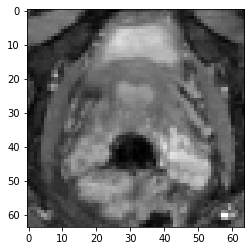

In [65]:
plt.imshow(img[9,0,:,:],cmap='gray')